In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go

In [ ]:
# reading data from csv file
df = pd.read_csv('drive//MyDrive//Stock//Stroke.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# dropping the id column
df = df.drop(['id'], axis=1)

In [ ]:
# removing the other gender from the dataset
df = df[df.gender != "Other"]

In [ ]:
# ensuring that the other gender has been removed
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# checking for null values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# values in smoking status
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [ ]:
# since Unknown can be regarded as a null value so replacing it with np.nan value for further processing
df['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [ ]:
# checking for null values again
df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [ ]:
# filling up the null values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace = True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

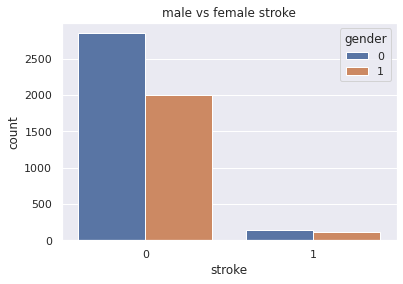

In [ ]:
# plotting gender relation with stroke
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="stroke", hue="gender")
plt.title("male vs female stroke")
plt.show()

In [ ]:
male_numbers  = df.loc[df.gender == 'Male', "gender"].count()
male_suffered = df[(df.gender.values =="Male") &(df.stroke.values == 1)].sum().stroke
print(male_suffered/male_numbers)
female_numbers  = df.loc[df.gender == 'Female', "gender"].count()
female_suffered = df[(df.gender.values =="Female") &(df.stroke.values == 1)].sum().stroke
print(male_suffered/male_numbers, female_suffered/female_numbers )

0.05106382978723404
0.05106382978723404 0.047094188376753505


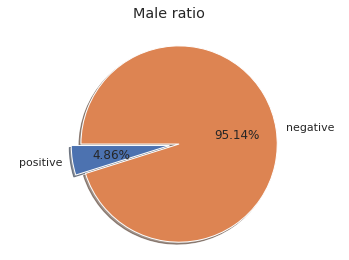

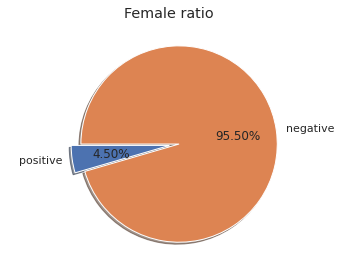

In [ ]:
fig_1, ax_1 = plt.subplots() # to plot subplots 
sizes = [male_suffered, male_numbers]
labels = 'positive', 'negative'
explode = (0, 0.1) 
ax_1.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, startangle=180)
ax_1.axis('equal')
fig_1.suptitle('Male ratio') 
fig_2, ax_2 = plt.subplots()
sizes = [female_suffered, female_numbers] 
ax_2.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, startangle=180)
ax_2.axis('equal')
fig_2.suptitle('Female ratio')
plt.show()

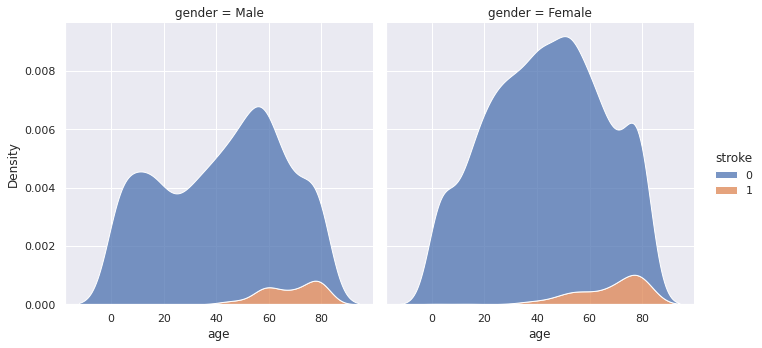

In [ ]:
# plotting density plot of genders with respect to age and stroke
a = sns.displot(data=df, col=df.gender, x=df.age, hue='stroke', multiple='stack', kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



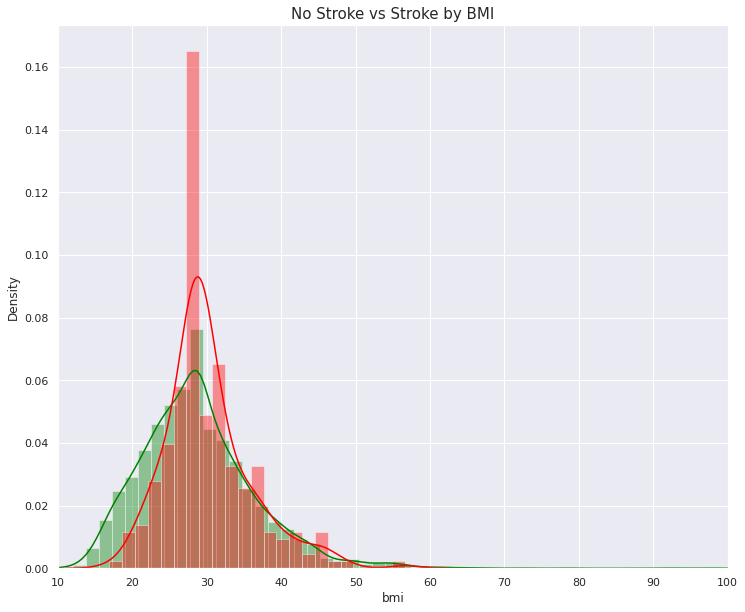

In [ ]:
# visualzing the realtionship of body mass index with stroke
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

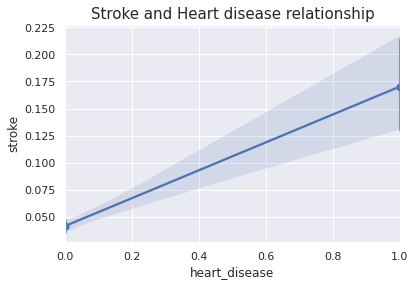

In [ ]:
# visualzing stroke and heart disease co-relation
sns.regplot(x="heart_disease", y="stroke", data=df, x_estimator=np.mean)
plt.title('Stroke and Heart disease relationship', fontsize=15)
plt.show()

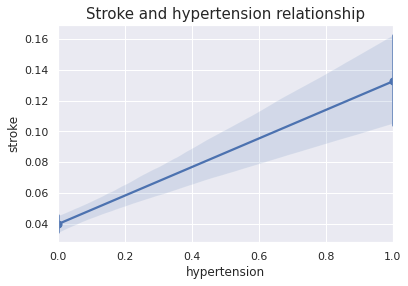

In [ ]:
# visualizing sroke and hyper tension relationship
sns.regplot(x="hypertension", y="stroke", data=df, x_estimator=np.mean)
plt.title('Stroke and hypertension relationship', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



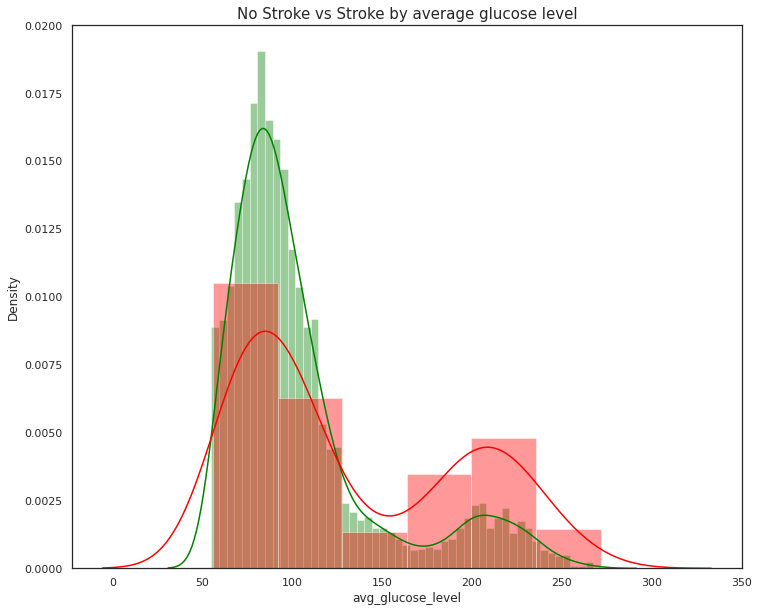

In [ ]:
# visualizing stroke realtion with average glucose level
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by average glucose level', fontsize=15)
# plt.xlim([10,100])
plt.show()

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
def data_preprocessing(dataframe):
  le= preprocessing.LabelEncoder()
  dataframe.gender = le.fit_transform(dataframe.gender)  # male =1, female =0
  dataframe.ever_married = le.fit_transform(dataframe.ever_married) # yes = 1, no = 0
  dataframe.Residence_type = le.fit_transform(dataframe.Residence_type) # urban =1, rural =0
  dataframe=pd.get_dummies(dataframe,columns=['work_type','smoking_status'],drop_first=True)
  scaled_data = dataframe.copy()
  col_names=['age','avg_glucose_level','bmi']
  features = scaled_data[col_names]
  scaler = MinMaxScaler(feature_range=(0,1)).fit(features) # normalizing values between 0 and 1
  features = scaler.transform(features)
  scaled_data[col_names] = features
  return scaled_data

In [ ]:
df3 = data_preprocessing(df)

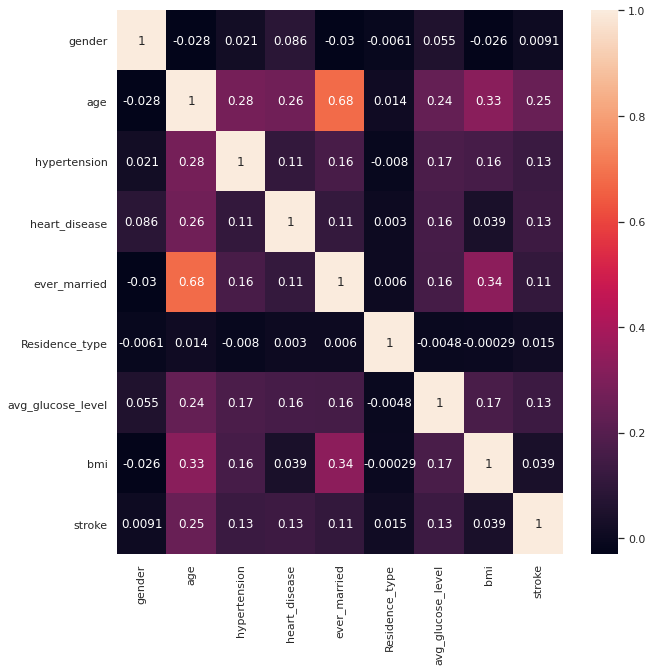

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True)

In [ ]:
X = df3.drop(['stroke'],axis=1)
y = df3['stroke']
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# return X_train, X_test, y_train, y_test

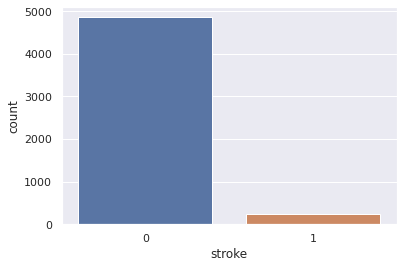

In [ ]:
# visualizing the number of non stroke vs stroke patients  
sns.countplot(x=df.stroke)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Counts of label '1': {}".format(sum(y_train==1)))
print("Counts of label '0': {}".format(sum(y_train==0)))

Counts of label '1': 187
Counts of label '0': 3900


In [ ]:
sm = SMOTE(random_state=42)
X_train_smote,y_train_smote = sm.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
print('before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))

before OverSampling, the shape of train_X: (4087, 14)
before OverSampling, the shape of train_y: (4087,) 

After OverSampling, the shape of train_X: (7800, 14)
After OverSampling, the shape of train_y: (7800,) 

After OverSampling, counts of label '1': 3900
After OverSampling, counts of label '0': 3900


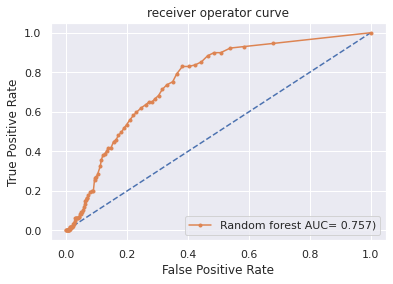

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = RandomForestClassifier()
model.fit(X_train_smote, y_train_smote)
# predict probabilities
rf_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random forest AUC= {:.3f})'.format(rf_auc))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('receiver operator curve')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from sklearn import tree
from graphviz import Source

In [ ]:
# total number of trees in random forest
len(model.estimators_)

In [ ]:
graph = Source( tree.export_graphviz(model.estimators_[10], out_file=None, feature_names=x_encoded.columns))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes) #saving as a png file

Deep Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras

In [ ]:
# defining a model
model_dnn = Sequential()
model_dnn.add(Dense(10, input_shape=(14,),  activation='relu'))
model_dnn.add(Dense(8, activation='relu'))
model_dnn.add(Dense(5, activation='relu'))
model_dnn.add(Dense(1, activation='sigmoid'))
model_dnn.compile(loss=keras.losses.BinaryCrossentropy(), metrics = "acc", optimizer='adam')

In [ ]:
history = model_dnn.fit(X_train_smote, y_train_smote, epochs=500, batch_size=1, verbose=2)
model_dnn.summary()

Epoch 1/500
4868/4868 - 6s - loss: 0.3804 - acc: 0.8260
Epoch 2/500
4868/4868 - 6s - loss: 0.3727 - acc: 0.8307
Epoch 3/500
4868/4868 - 6s - loss: 0.3631 - acc: 0.8367
Epoch 4/500
4868/4868 - 6s - loss: 0.3597 - acc: 0.8414
Epoch 5/500
4868/4868 - 6s - loss: 0.3486 - acc: 0.8394
Epoch 6/500
4868/4868 - 6s - loss: 0.3408 - acc: 0.8461
Epoch 7/500
4868/4868 - 6s - loss: 0.3321 - acc: 0.8507
Epoch 8/500
4868/4868 - 6s - loss: 0.3270 - acc: 0.8552
Epoch 9/500
4868/4868 - 6s - loss: 0.3223 - acc: 0.8515
Epoch 10/500
4868/4868 - 6s - loss: 0.3173 - acc: 0.8548
Epoch 11/500
4868/4868 - 6s - loss: 0.3122 - acc: 0.8603
Epoch 12/500
4868/4868 - 6s - loss: 0.3072 - acc: 0.8603
Epoch 13/500
4868/4868 - 6s - loss: 0.3037 - acc: 0.8636
Epoch 14/500
4868/4868 - 6s - loss: 0.2994 - acc: 0.8632
Epoch 15/500
4868/4868 - 6s - loss: 0.2946 - acc: 0.8724
Epoch 16/500
4868/4868 - 6s - loss: 0.2930 - acc: 0.8675
Epoch 17/500
4868/4868 - 6s - loss: 0.2914 - acc: 0.8739
Epoch 18/500
4868/4868 - 6s - loss: 0.28

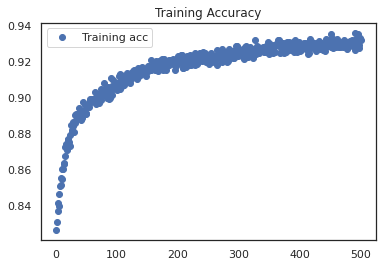

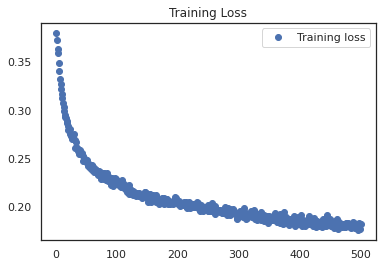

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [ ]:
dnn_y_predict = model_dnn.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model_dnn.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

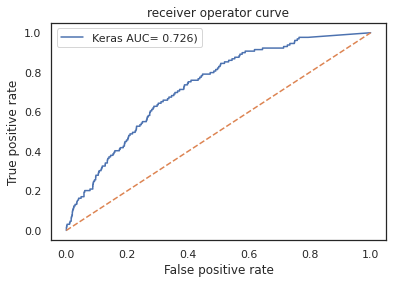

In [ ]:
plt.plot(fpr_keras, tpr_keras, label='Keras AUC= {:.3f})'.format(auc_keras))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('receiver operator curve')
plt.legend(loc='best')
plt.show()